<a href="https://colab.research.google.com/github/atolman01/Sentiment_Analysis_Manning/blob/main/AmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


Install ndjson with :
`!pip install ndjson`

To open and read a file with this format:                                      
`with open('/content/drive/My Drive/location_of_file','r or w') as read:`
  `data = ndjson.reader(read)`

To show all content of file:
  `for post in read:`
    `print(post)`

  

   overall  verified   reviewTime  ... vote style image
0      5.0      True  10 17, 2015  ...  NaN   NaN   NaN
1      4.0     False  07 27, 2015  ...  NaN   NaN   NaN

[2 rows x 12 columns]
0         5.0
1         4.0
2         3.0
3         2.0
4         5.0
         ... 
497572    4.0
497573    3.0
497574    3.0
497575    4.0
497576    2.0
Name: overall, Length: 497577, dtype: float64


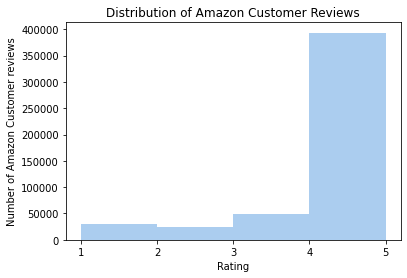

In [ ]:
!pip install ndjson     #Do this because Colab does not have ndjson installed
import ndjson
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



with open ('/content/drive/My Drive/NLP Python/Data/Video_Games_5.json','r') as read_file:     
  data = ndjson.reader(read_file)
  
  reviews = pd.DataFrame(data)
  print(reviews.head(2))
  print(reviews.overall)

  xbins = [1,2,3,4,5]                                   #Number of ratings - 5
  #ybins = [25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000]
  plt.hist(reviews.overall,bins=xbins, color='#abcdef')   #Create a histogram, using the overall review rating, set the bins attribute to the bins array
  plt.xticks(xbins)                                     #Make the X-ticks match the xbins 
  #plt.yticks(ybins)                                     #Make the Y-ticks match the ybins

  plt.title('Distribution of Amazon Customer Reviews')
  plt.ylabel('Number of Amazon Customer reviews')
  plt.xlabel('Rating')

  
  plt.show()                          #show the plot
  

In [ ]:
reviews.groupby('overall').size()

overall
1.0     30883
2.0     24135
3.0     49146
4.0     93654
5.0    299759
dtype: int64

In [ ]:
ratings = reviews[['overall', 'reviewText']]

rc1 = ratings.where((ratings.overall==1.0)).dropna()
rc1 = rc1.sample(n=1500,random_state=42)
rc1.reset_index(drop=True, inplace=True)
rc1.head()

,overall,reviewText
0,1.0,Made in china... either a single bad luck of t...
1,1.0,"Having played all of the other games, I was so..."
2,1.0,"Macro buttons in the way (obviously?), can't l..."
3,1.0,"Just received my ""Cronusmax Plus"" and after so..."
4,1.0,"Not worth the learning curve, the nunchuck+wii..."


In [ ]:
rc2 = ratings.where((ratings.overall==2.0)).dropna()
rc2 = rc2.sample(n=500,random_state=42)
rc2.reset_index(drop=True, inplace=True)
rc2.head()

,overall,reviewText
0,2.0,I haven't gotten past the first level because ...
1,2.0,"This game is pretty bad, I used to be an MK fa..."
2,2.0,Wasn't the right memory card needs to tell sho...
3,2.0,"I honestly do not like cheat devices, but sinc..."
4,2.0,"too fast, not a real castlevania game. More li..."


In [ ]:

rc3 = ratings.where((ratings.overall==3.0)).dropna()
rc3 = rc3.sample(n=500,random_state=42)
rc3.reset_index(drop=True, inplace=True)
rc3.head()

,overall,reviewText
0,3.0,I am a bit conflicted with this controller...\...
1,3.0,"Some of the games are so convoluted and ""busy""..."
2,3.0,I'll make this review quick. The 360 has great...
3,3.0,"At launch, this game was awful. Origin sucked,..."
4,3.0,Breakthrough is an expansion pack to Medal of ...


In [ ]:
rc4 = ratings.where((ratings.overall==4.0)).dropna()     #.dropna() removes all null and NaN rows/columns in DataFrame
rc4 = rc4.sample(n=500,random_state=42)                  #n : number of random samples                          random_state: 
rc4.reset_index(drop=True, inplace=True)                 #drop : adds replaced index column to data if false    inplace: makes changes to the orignal dataframe itself if true
rc4.head()

,overall,reviewText
0,4.0,"While I've been favoring RTS's, simulations an..."
1,4.0,We bought this wheel so the kids could play Dr...
2,4.0,Still waiting for more game modes and the opti...
3,4.0,Overall this is a really good game. It is an a...
4,4.0,I was very skeptical about this game. However ...


In [ ]:
rc5 = ratings.where((ratings.overall==5.0)).dropna()    #.dropna() removes all null and NaN rows/columns in DataFrame
rc5 = rc5.sample(n=1500,random_state=42)
rc5.reset_index(drop=True, inplace=True)
rc5.head()


,overall,reviewText
0,5.0,Excellent
1,5.0,Whether it'd be for the Xbox or the Playstatio...
2,5.0,"This game link cable, in my opinion, is MUCH b..."
3,5.0,I can't rate this game highly enough. It has v...
4,5.0,This game has a massive world to roam around i...


In [ ]:
reviews2to4 = pd.concat([rc2,rc3,rc4], sort=False)      #concat reviews from 2 - 4 into one dataframe
reviews2to4.reset_index(inplace=True, drop=True)
reviews2to4.head(), reviews2to4.shape

(   overall                                         reviewText
 0      2.0  I haven't gotten past the first level because ...
 1      2.0  This game is pretty bad, I used to be an MK fa...
 2      2.0  Wasn't the right memory card needs to tell sho...
 3      2.0  I honestly do not like cheat devices, but sinc...
 4      2.0  too fast, not a real castlevania game. More li..., (1500, 2))

In [ ]:
scReviews = pd.concat([reviews2to4, rc1, rc5], sort=False)    #concat all reviews from 1 - 5 in one dataframe
scReviews.reset_index(inplace=True, drop=True)
scReviews.head(), scReviews.shape

(   overall                                         reviewText
 0      2.0  I haven't gotten past the first level because ...
 1      2.0  This game is pretty bad, I used to be an MK fa...
 2      2.0  Wasn't the right memory card needs to tell sho...
 3      2.0  I honestly do not like cheat devices, but sinc...
 4      2.0  too fast, not a real castlevania game. More li..., (4500, 2))

In [ ]:
scReviews = scReviews.sort_values('overall')     #sort reviews from 1 - 5
scReviews.reset_index(drop=True,inplace=True)    #reset indexes
scReviews = scReviews.rename(columns = {'overall':'ratings','reviewText':'reviews'})    #rename columns
scReviews.head()

,ratings,reviews
0,1.0,"At first glance, this Sega Classics Collection..."
1,1.0,Stopped working after a week. You get what you...
2,1.0,"Cheap deaths, horrible camera, and no knowledg..."
3,1.0,O.K. I will keep it short and sweet. I thoug...
4,1.0,this Adapter would have been just fine....if i...


In [ ]:
scReviews.tail()

,ratings,reviews
4495,5.0,I love this game so much that I wanted to live...
4496,5.0,this is a great game
4497,5.0,I love shooters where you're not some green ar...
4498,5.0,LBP is a fun platformer that even my wife can'...
4499,5.0,It is a blast.\nKind of repetitive after like ...


In [ ]:
#Get the large corpus 

lcReviews = ratings.sample(n=100000,random_state=42)
lcReviews.reset_index(inplace=True, drop=True)
lcReviews = lcReviews.rename(columns = {'overall':'ratings','reviewText':'reviews'})
lcReviews.head()
#lcReviews.tail()

,ratings,reviews
0,5.0,Love this 3ds game. I made a zombie Togepi wit...
1,5.0,Fun game
2,5.0,This game is so fun. I think it is the best S...
3,5.0,I hated the first game but absolutely love thi...
4,5.0,Love the Tales games. Glad I purchased this one.


In [ ]:
lcReviews = lcReviews.sort_values('ratings')
lcReviews.reset_index(drop=True,inplace=True)
lcReviews.head()
#lcReviews.shape

,ratings,reviews
0,1.0,To say the idea of making a video game based o...
1,1.0,"This is was a waste, even at a discounted pric..."
2,1.0,After two weeks the cords stopped charging. Bu...
3,1.0,This is my first Lego game and it only gives t...
4,1.0,First thing you should know is that this revie...


In [ ]:
scReviews.to_csv('small_corpus.csv')
lcReviews.to_csv('large_corpus.csv')

#!cp 'small_corpus.csv' "/content/drive/My Drive/NLP Python/Data"
#!cp 'large_corpus.csv' "/content/drive/My Drive/NLP Python/Data"

`pandas.describe()`                     
      by default this method will generate statistics for all numeric columns within a table